# Spotify Manipulation with Python

## Introduction
Data Science is vast and continuously expands into new industries, offering a multitude of valuable (corporate mainly) applications. The music industry is one of them. Should we treat any of those applications like a "black box", we would observe an input (data) and an output (product).

**Scope**: This project aims to manipulate the Spotify music data with Python, having a twofold scope:

✔️ proving that the existence of an API (Application Programming Interface) is of high importance, in terms of feeding algorithms with extra fine data.

✔️ demonstrating how plain statistics (when properly applied) can encode daily actions, break them down into their fundamental elements and on top of them build valuable products.

We are going to use a series of free Python libraries (including Pandas, Requests and Spotipy), make requests to the Spotify API for data collection (data fetching), and perform EDA on them, depicting finally a number of data visualizations to better communicate the results.

**Scenario**: Lately, the Data Corp I work for as a data scientist, records remarkable profits from their Youth Marketing segment and in reward for this, it rewards its young customers with a party. In the absence of a DJ, my supervisor asked me to take care of the music and make the party last until the morning! She gave to me a number of Spotify playlists, the PR department had already created, in order to check them out and create the final one. My blindness to the modern music generally, leads me to a tricky alternative:

*How about accessing all the playlists using Python, extracting every single audio feature of each track, reason about them statistically and wrapping  the most suitable (to our party) tracks to a final playlist? Given of course a technicality: I am not going to hear a single beat of any of them!*

[*It stands as an independent analysis in an effort to enhance my ability to communicate results, reason about data statistically and stay motivated to continuously implement newly aquired skills & capabilities, so as to enrich my portfolio of data science-oriented projects*]

In [1]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util

from spotipy.oauth2 import SpotifyClientCredentials

## Authorization Flow

In [2]:
# Declare the credentials
cid = ''
secret = ''
redirect_uri='http://localhost'
username = 'devinpowers'

# https://developer.spotify.com/dashboard/applications/

In [3]:
# Authorization flow
scope = 'user-top-read'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)
#token = util.prompt_for_user_token(scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for")

Couldn't read cache at: .cache-devinpowers
Using `localhost` as redirect URI without a port. Specify a port (e.g. `localhost:8080`) to allow automatic retrieval of authentication code instead of having to copy and paste the URL your browser is redirected to.


Enter the URL you were redirected to: http://localhost/?code=AQBnQa8kph08f4wvfim3Wshg9z8mcCBP1_ndsC77tgjQU3lu7rWuBtssQ2PrGBiX3ESGmdjmmLMC-7atcvo4BK9wEbbMLiRhBavTjSkWpeITlz-JsVzZm04ThMbnyrCi81iz40yXn1YSCYnZJGJDooxO4OiTlxVLYTlOCcV69L_UCjE


Couldn't read cache at: .cache-devinpowers


## Extract the User's Top50 Tracks (*Optional*)

In [4]:
# Fetch the top-50 songs of the user
if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_top_tracks(limit=50,offset=0,time_range='medium_term')
    for song in range(50):
        list = []
        list.append(results)
        with open('top50_data.json', 'w', encoding='utf-8') as f:
            json.dump(list, f, ensure_ascii=False, indent=4)
else:
    print("Can't get token for", username)

In [5]:
# Open the JSON file to Python objects
with open('top50_data.json') as f:
  data = json.load(f)

In [6]:
len(data[0]['items'])

50

In [7]:
list_of_results = data[0]["items"]
list_of_artist_names = []
list_of_artist_uri = []
list_of_song_names = []
list_of_song_uri = []
list_of_durations_ms = []
list_of_explicit = []
list_of_albums = []
list_of_popularity = []

for result in list_of_results:
    result["album"]
    this_artists_name = result["artists"][0]["name"]
    list_of_artist_names.append(this_artists_name)
    this_artists_uri = result["artists"][0]["uri"]
    list_of_artist_uri.append(this_artists_uri)
    list_of_songs = result["name"]
    list_of_song_names.append(list_of_songs)
    song_uri = result["uri"]
    list_of_song_uri.append(song_uri)
    list_of_duration = result["duration_ms"]
    list_of_durations_ms.append(list_of_duration)
    song_explicit = result["explicit"]
    list_of_explicit.append(song_explicit)
    this_album = result["album"]["name"]
    list_of_albums.append(this_album)
    song_popularity = result["popularity"]
    list_of_popularity.append(song_popularity)

In [8]:
# Convert the pulled content to a pandas df
all_songs = pd.DataFrame(
    {'artist': list_of_artist_names,
     'artist_uri': list_of_artist_uri,
     'song': list_of_song_names,
     'song_uri': list_of_song_uri,
     'duration_ms': list_of_durations_ms,
     'explicit': list_of_explicit,
     'album': list_of_albums,
     'popularity': list_of_popularity
     
    })

In [9]:
all_songs.sort_values('popularity', ascending=False)

,artist,artist_uri,song,song_uri,duration_ms,explicit,album,popularity
29,Glass Animals,spotify:artist:4yvcSjfu4PC0CYQyLy4wSq,Heat Waves,spotify:track:02MWAaffLxlfxAUY7c5dvx,238805,False,Dreamland (+ Bonus Levels),96
7,Adele,spotify:artist:4dpARuHxo51G3z768sgnrY,Easy On Me,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,224694,False,Easy On Me,95
33,Drake,spotify:artist:3TVXtAsR1Inumwj472S9r4,Knife Talk (with 21 Savage ft. Project Pat),spotify:track:2BcMwX1MPV6ZHP4tUT9uq6,242965,True,Certified Lover Boy,90
12,Creedence Clearwater Revival,spotify:artist:3IYUhFvPQItj6xySrBmZkd,Fortunate Son,spotify:track:4BP3uh0hFLFRb5cjsgLqDh,140773,False,Willy And The Poor Boys,84
34,Lil Durk,spotify:artist:3hcs9uc56yIGFCSy9leWe7,Broadway Girls (feat. Morgan Wallen),spotify:track:3DZ8dbKg4OTSSqGARvecYd,185600,False,Broadway Girls (feat. Morgan Wallen),84
16,The Rolling Stones,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,"Paint It, Black",spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,202266,False,Aftermath,83
40,Billy Joel,spotify:artist:6zFYqv1mOsgBRQbae3JJ9e,Vienna,spotify:track:4U45aEWtQhrm8A5mxPaFZ7,214240,False,The Stranger (Legacy Edition),82
48,Rage Against The Machine,spotify:artist:2d0hyoQ5ynDBnkvAbJKORj,Killing In The Name,spotify:track:59WN2psjkt1tyaxjspN8fp,313573,True,Rage Against The Machine - XX (20th Anniversar...,82
4,Led Zeppelin,spotify:artist:36QJpDe2go2KgaRleHCDTp,Immigrant Song - Remaster,spotify:track:78lgmZwycJ3nzsdgmPPGNx,146250,False,Led Zeppelin III (Remaster),81
19,The Rolling Stones,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,Start Me Up - Remastered 2009,spotify:track:7HKez549fwJQDzx3zLjHKC,213066,False,Tattoo You (2009 Re-Mastered),80


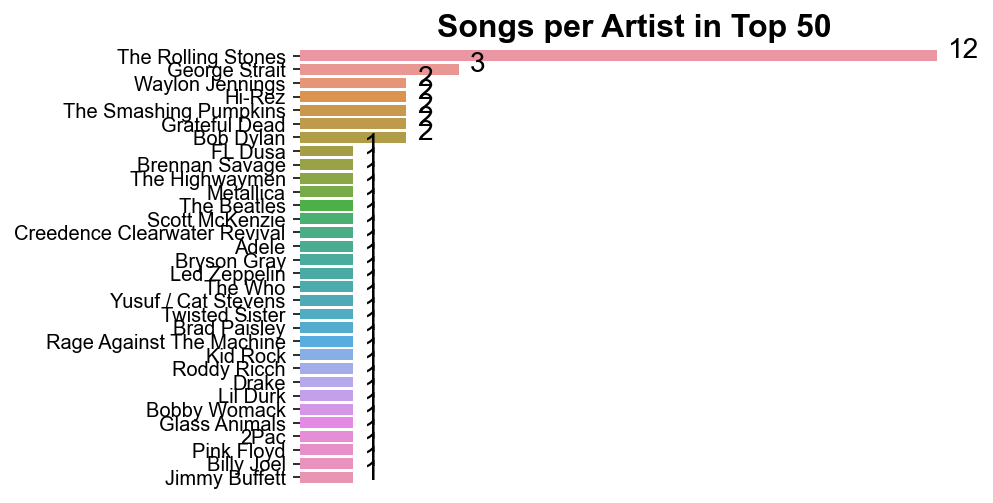

In [10]:
descending_order = all_songs['artist'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(y = all_songs['artist'], order=descending_order)

sns.despine(fig=None, ax=None, top=True, right=True, left=False, trim=False)
sns.set(rc={'figure.figsize':(15,20)})

ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Songs per Artist in Top 50', fontsize=16, fontweight='heavy')
sns.set(font_scale = 1.4)
ax.axes.get_xaxis().set_visible(False)
ax.set_frame_on(False)

y = all_songs['artist'].value_counts()
for i, v in enumerate(y):
    ax.text(v + 0.2, i + .16, str(v), color='black', fontweight='light', fontsize=14)
    
plt.show()

## Extract the User's Playlists

In [19]:
# Fetch the user's playlists
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists(username)
for playlist in playlists['items']:
    print('Name: {}, Playlist ID: {}, No Tracks: {}'.
          format(playlist['name'], playlist['id'], playlist['tracks']['total']))

Name: Christmas, Playlist ID: 6ZRZ54x3tM5rrFsx9OMqc8, No Tracks: 18


In [20]:
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [21]:
fetch_playlists(sp,username)

,id,name,#tracks
0,6ZRZ54x3tM5rrFsx9OMqc8,Christmas,18


## Extract the User's Playlists' Tracks

* playlist_id from Spotify

In [22]:
def fetch_playlist_tracks(sp, username, playlist_id):
    """
    Returns the tracks for the given playlist.
    """
        
    offset = 0
    tracks = []
    
    # Make the API request
    while True:
        content = sp.user_playlist_tracks(username, playlist_id, fields=None, limit=100, offset=offset, market=None)
        tracks += content['items']
        
        if content['next'] is not None:
            offset += 100
        else:
            break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name'])
    
    # Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [25]:
fetch_playlist_tracks(sp, username, '6ZRZ54x3tM5rrFsx9OMqc8')

,track_id,track_name
0,3KQZfTzm43Z1fqTr3YjmBO,What Christmas Means To Me
1,69lOXkCMEPFSDwuuznGjMy,I Saw Mommy Kissing Santa Claus
2,6UtMqJpaqnGYitxvK84gZp,Santa Claus Is Coming To Town
3,6VqLlCjW2IPuNWyVa6Ramd,Someday At Christmas
4,0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You
5,4STCTQ1h0VuWfvDyhGOxkv,Merry Christmas Baby
6,6dS8K7TGbj64tZWCasPoQa,Give Love On Christmas Day
7,3KyiyDkz1X8lu6tpkx0va1,I Want To Come Home For Christmas
8,49xYEvrg8Tlr1bnpU5aaFI,The Christmas Song
9,6fuzlpwJzt11Pge2ImY9jE,It's Christmas Time


## Extract the Tracks' Audio Features

In [26]:
def fetch_audio_features(sp, username, playlist_id):
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence'],
                              features['speechiness'], features['instrumentalness'],
                              features['liveness'], features['acousticness']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence',
                                                             'speechiness', 'instrumentalness',
                                                             'liveness', 'acousticness'])
    
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
        
    return df_playlist_audio_features

In [27]:
df = fetch_audio_features(sp, username, '6ZRZ54x3tM5rrFsx9OMqc8')
display(df.shape)
df.head(3)

(18, 10)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
3KQZfTzm43Z1fqTr3YjmBO,What Christmas Means To Me,0.499,0.589,167.032,-9.057,0.680,0.0532,0.000000,0.0849,0.207
69lOXkCMEPFSDwuuznGjMy,I Saw Mommy Kissing Santa Claus,0.582,0.818,128.891,-5.364,0.708,0.0549,0.000002,0.8320,0.133
6UtMqJpaqnGYitxvK84gZp,Santa Claus Is Coming To Town,0.687,0.839,146.836,-2.207,0.952,0.0348,0.000009,0.1150,0.319


In [28]:
df1 = fetch_audio_features(sp, username, '6ZRZ54x3tM5rrFsx9OMqc8')
display(df1.shape)
df1.head(3)

(18, 10)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
3KQZfTzm43Z1fqTr3YjmBO,What Christmas Means To Me,0.499,0.589,167.032,-9.057,0.680,0.0532,0.000000,0.0849,0.207
69lOXkCMEPFSDwuuznGjMy,I Saw Mommy Kissing Santa Claus,0.582,0.818,128.891,-5.364,0.708,0.0549,0.000002,0.8320,0.133
6UtMqJpaqnGYitxvK84gZp,Santa Claus Is Coming To Town,0.687,0.839,146.836,-2.207,0.952,0.0348,0.000009,0.1150,0.319


In [29]:
for feature in df1.columns:
    if feature == 'tempo' or feature == 'loudness':
        continue
    df1[feature] = df1[feature] * 100

In [30]:
df1.head(3)

,track_name,danceability,energy,tempo,loudness,valence,speechiness,instrumentalness,liveness,acousticness
track_id,,,,,,,,,,
3KQZfTzm43Z1fqTr3YjmBO,What Christmas Means To MeWhat Christmas Means...,49.9,58.9,167.032,-9.057,68.0,5.32,0.000000,8.49,20.7
69lOXkCMEPFSDwuuznGjMy,I Saw Mommy Kissing Santa ClausI Saw Mommy Kis...,58.2,81.8,128.891,-5.364,70.8,5.49,0.000189,83.20,13.3
6UtMqJpaqnGYitxvK84gZp,Santa Claus Is Coming To TownSanta Claus Is Co...,68.7,83.9,146.836,-2.207,95.2,3.48,0.000944,11.50,31.9


In [32]:
def fetch_audio_features(sp, username, playlist_id):
    """
    Returns the selected audio features of every track, 
    for the given playlist.
    """
    
    playlist = fetch_playlist_tracks(sp, username, playlist_id)
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Append the audio features in a list
    features_list = []
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['energy'], features['tempo'],
                              features['loudness'], features['valence']])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'energy',
                                                             'tempo', 'loudness', 'valence'])

    # Set the 'tempo' & 'loudness' in the same range with the rest features
    for feature in df_audio_features.columns:
        if feature == 'tempo' or feature == 'loudness':
            continue
        df_audio_features[feature] = df_audio_features[feature] * 100
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    df_playlist_audio_features.set_index('track_id', inplace=True, drop=True)
    
    return df_playlist_audio_features

In [33]:
df2 = fetch_audio_features(sp, username, '6ZRZ54x3tM5rrFsx9OMqc8')
df2.head(3)

,track_name,danceability,energy,tempo,loudness,valence
track_id,,,,,,
3KQZfTzm43Z1fqTr3YjmBO,What Christmas Means To Me,49.9,58.9,167.032,-9.057,68.0
69lOXkCMEPFSDwuuznGjMy,I Saw Mommy Kissing Santa Claus,58.2,81.8,128.891,-5.364,70.8
6UtMqJpaqnGYitxvK84gZp,Santa Claus Is Coming To Town,68.7,83.9,146.836,-2.207,95.2


## Access the User's Playlists

In [34]:
playlists = fetch_playlists(sp,username)
playlists = playlists[:4].copy()
playlists

,id,name,#tracks
0,6ZRZ54x3tM5rrFsx9OMqc8,Christmas,18


In [35]:
df_dinner = fetch_audio_features(sp, username, '37SqXO5bm81JmGCiuhin0L')
df_party = fetch_audio_features(sp, username, '2m75Xwwn4YqhwsxHH7Qc9W')
df_lounge = fetch_audio_features(sp, username, '6Jbi3Y7ZNNgSrPaZF4DpUp')
df_pop = fetch_audio_features(sp, username, '3u2nUYNuI08yUg877JE5FI')

In [36]:
df_dinner.head().iloc[:, 1:]

,danceability,energy,tempo,loudness,valence
track_id,,,,,
6itWAD2WxmAVQgWuk85yXx,61.4,10.6,75.890,-22.097,16.9
7wIYDzWW82O6Rc4vGuzjND,45.5,26.5,176.036,-8.468,32.4
6DD6q9mMJUqdoYb1GqwQiI,66.1,33.9,88.893,-11.665,44.8
418awaNpluyE2Lvoh6lD0p,60.7,24.7,129.944,-16.756,48.9
4yZYolqyUgoGxSCoKZuYjN,73.9,19.9,88.466,-11.763,63.1


<ipython-input-37-1271f9ac8ed3>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_dinner.mean().plot.barh(ax=ax1, colormap=plt.cm.Accent, fontsize=13)
<ipython-input-37-1271f9ac8ed3>:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_party.mean().plot.barh(ax=ax2, colormap='winter', fontsize=13)
<ipython-input-37-1271f9ac8ed3>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_lounge.mean().plot.barh(ax=ax3, colormap='cubehelix', fontsize=13)
<ipython-input-37-1271f9ac8ed3>:21: F

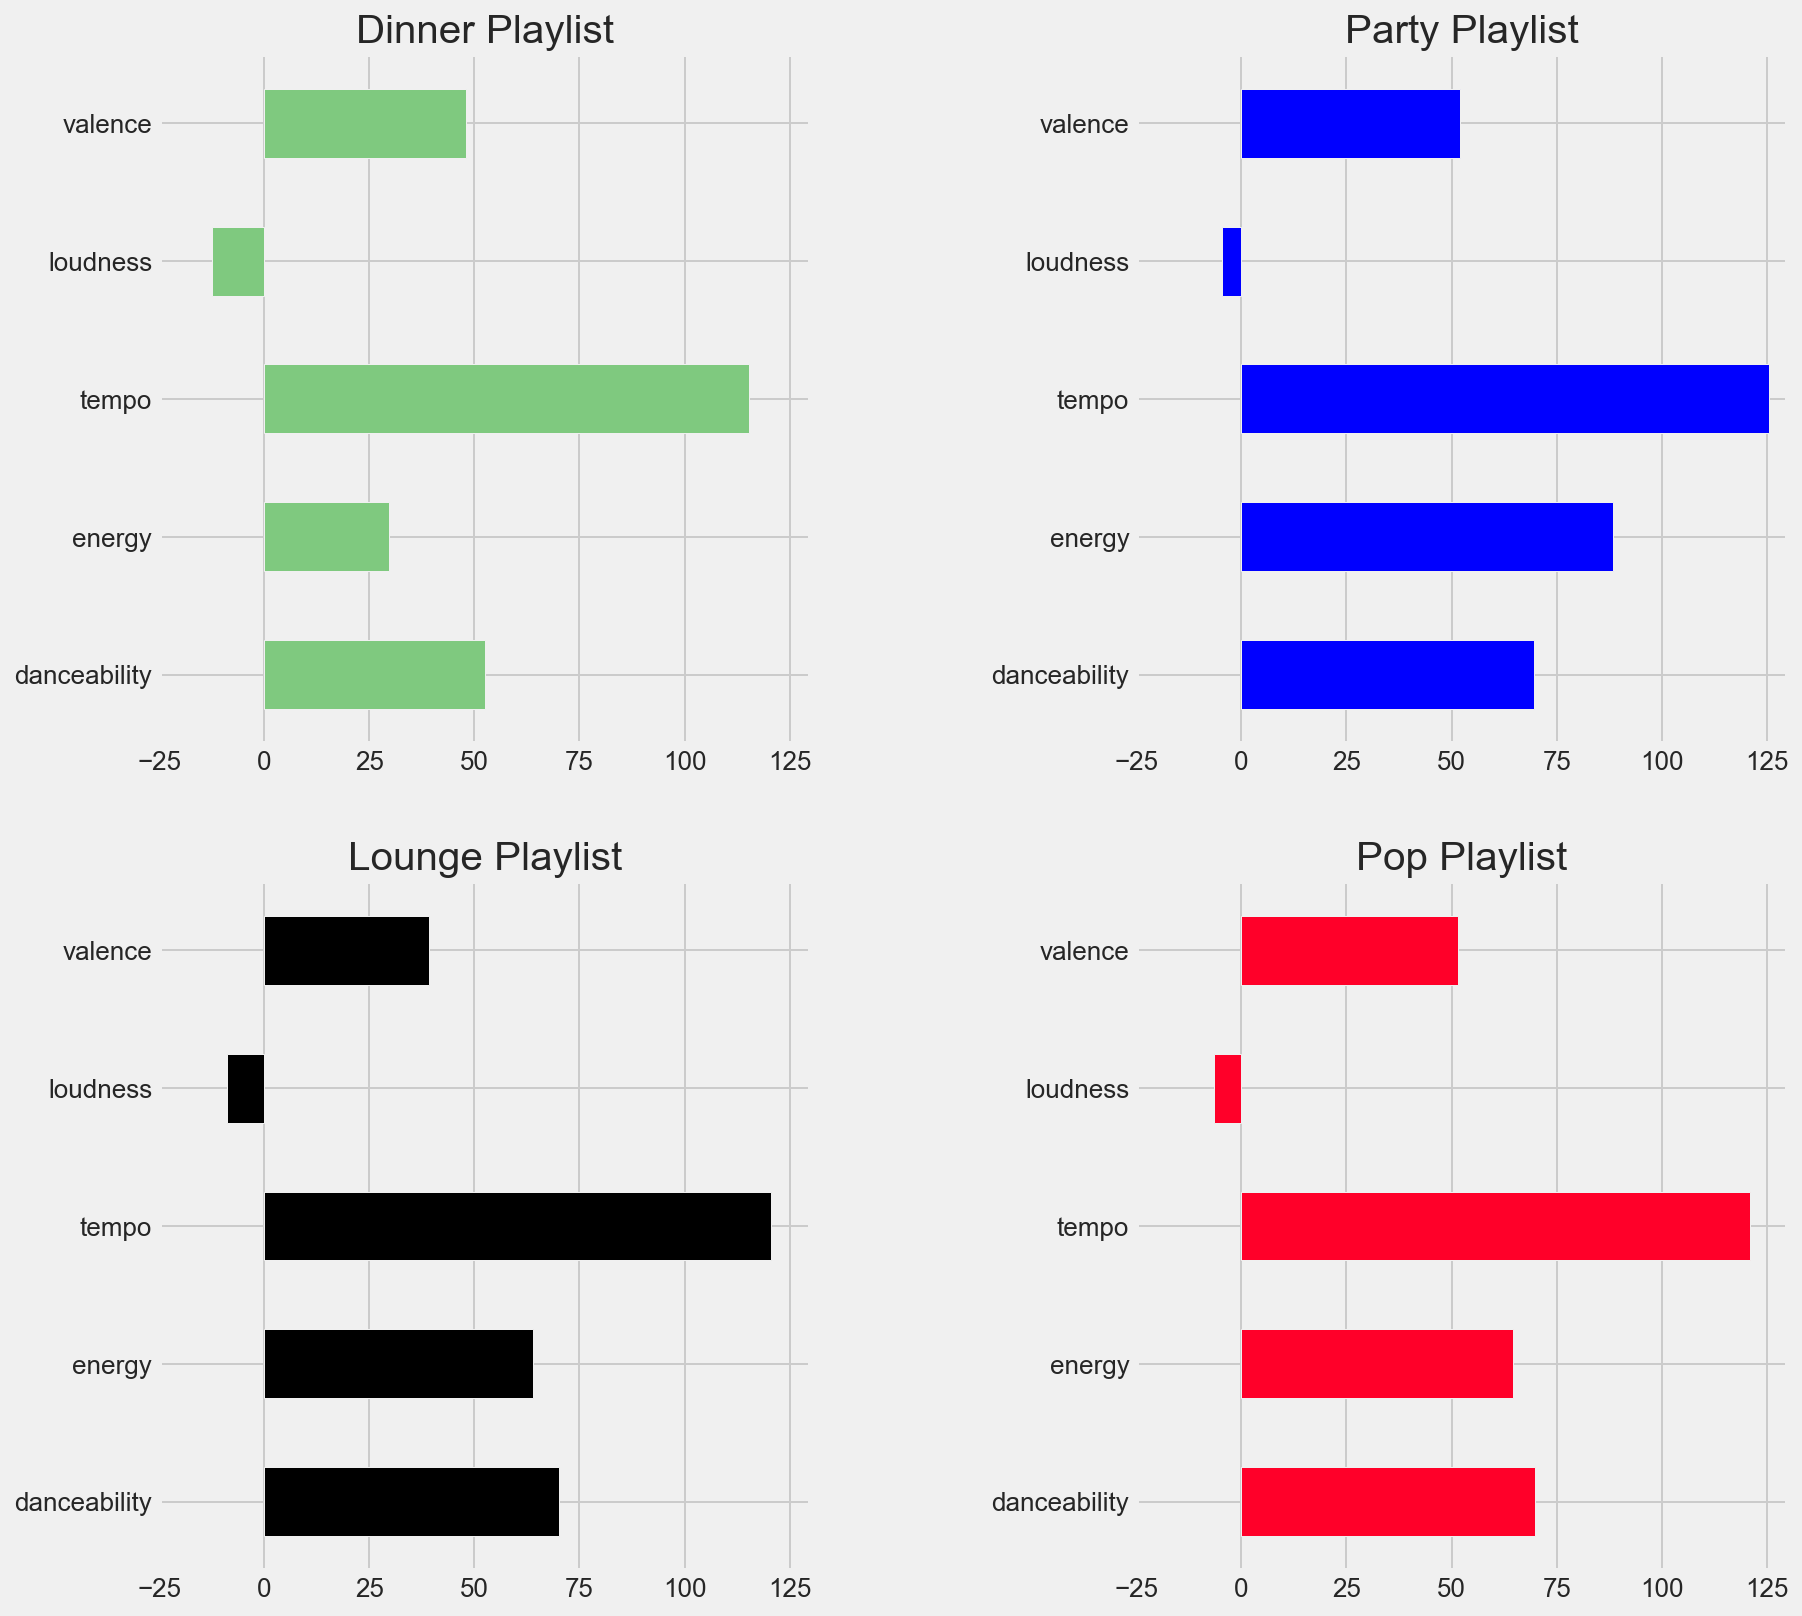

In [37]:
# Create a figure
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 13))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.2, wspace=.5)

# top left
df_dinner.mean().plot.barh(ax=ax1, colormap=plt.cm.Accent, fontsize=13)
ax1.set_xlim(-25,130)

# top right
df_party.mean().plot.barh(ax=ax2, colormap='winter', fontsize=13)
ax2.set_xlim(-25,130)

# bottom left
df_lounge.mean().plot.barh(ax=ax3, colormap='cubehelix', fontsize=13)
ax3.set_xlim(-25,130)

# bottom right
df_pop.mean().plot.barh(ax=ax4, colormap='gist_rainbow', fontsize=13)
ax4.set_xlim(-25,130)

# Create axis titles
ax1.set_title('Dinner Playlist')
ax2.set_title('Party Playlist')
ax3.set_title('Lounge Playlist')
ax4.set_title('Pop Playlist')

plt.show()

More than obviously, the `Party` and `Pop` playlists are more suitable to the ceremony, the rest can be ignored.

In [38]:
display(df_party.mean())
display(df_party.shape)
display(df_pop.mean())
df_pop.shape

<ipython-input-38-2ba35408565d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df_party.mean())


danceability     69.555200
energy           88.343200
tempo           125.455688
loudness         -4.541128
valence          51.895440
dtype: float64

(125, 6)

<ipython-input-38-2ba35408565d>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  display(df_pop.mean())


danceability     69.787129
energy           64.534653
tempo           121.016545
loudness         -6.436416
valence          51.550198
dtype: float64

(101, 6)

An initial approach, gives the impression that the `Party` playlist overlaps the `Pop` one, in terms of the audio features, except from that of `danceability`. Let's get a more insightful depiction:

In [39]:
party_mean = pd.DataFrame(df_party.mean(), columns= ['party_playlist'])
pop_mean = pd.DataFrame(df_pop.mean(), columns= ['pop_playlist'])

<ipython-input-39-63a0e4be2e6d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  party_mean = pd.DataFrame(df_party.mean(), columns= ['party_playlist'])
<ipython-input-39-63a0e4be2e6d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pop_mean = pd.DataFrame(df_pop.mean(), columns= ['pop_playlist'])


In [40]:
party_pop_mean = pd.concat([party_mean, pop_mean], axis=1)
party_pop_mean

,party_playlist,pop_playlist
danceability,69.555200,69.787129
energy,88.343200,64.534653
tempo,125.455688,121.016545
loudness,-4.541128,-6.436416
valence,51.895440,51.550198


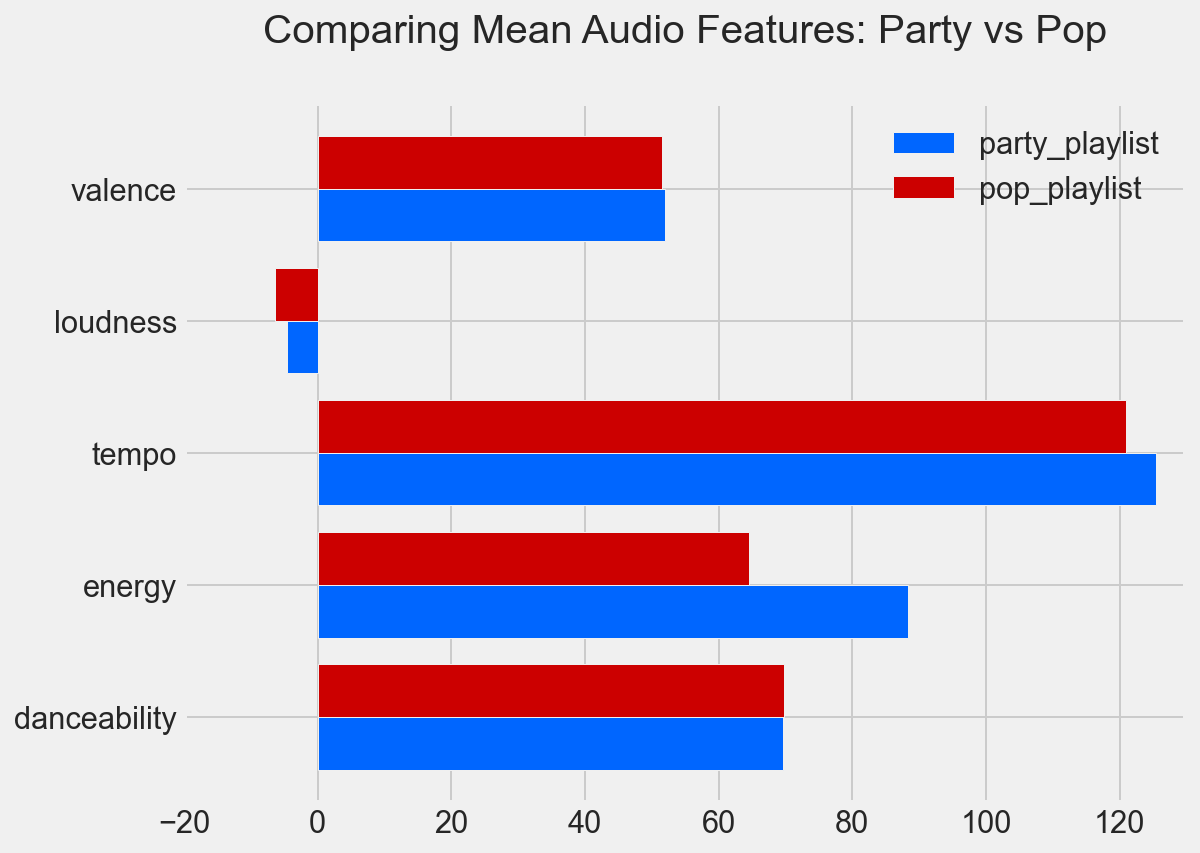

In [41]:
plt.style.use('fivethirtyeight')

party_pop_mean.plot.barh(color = ['#0066FF', '#CC0000'],  width = .8, rot = 0, figsize = (8,6))
plt.title('Comparing Mean Audio Features: Party vs Pop', y = 1.07)
plt.xlim(-20,130) # because ratings start at 0 and end at 5
plt.legend(framealpha = 0, loc = 'upper right')
plt.show()

Indeed, except from the `danceability`, the `Party` playlist is better than the `Pop` one, in terms of the
`loudness`, `tempo`, `energy` & `valence` audio features. So, we are going to focus on this one and get it as better it can be.

In [97]:
df_party.describe()

,danceability,energy,tempo,loudness,valence
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,69.556800,88.343200,125.455656,-4.541128,51.893040
std,11.315863,10.761515,8.300572,1.647072,25.111226
min,35.400000,58.300000,79.526000,-9.864000,3.920000
25%,62.100000,83.700000,124.034000,-5.484000,31.300000
50%,68.200000,92.200000,125.229000,-4.157000,52.600000
75%,77.200000,96.500000,126.018000,-3.430000,72.500000
max,96.700000,99.700000,171.017000,-0.131000,96.500000


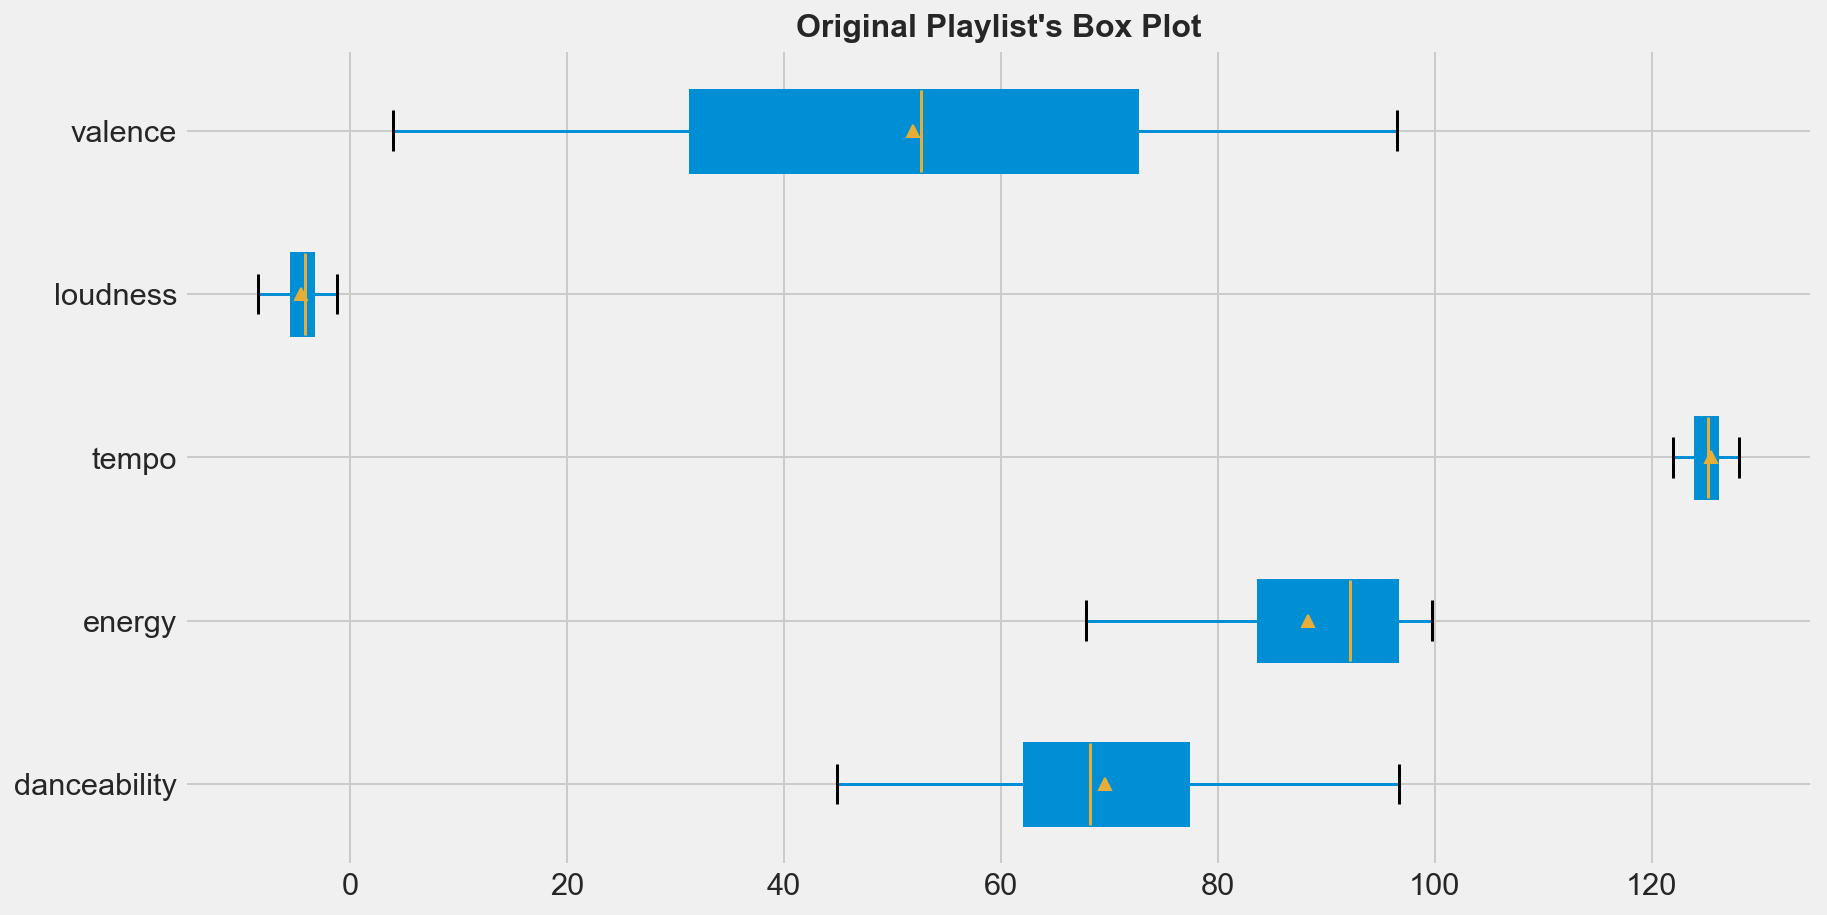

In [98]:
df_party.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Original Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

🔹From the above Box-and-Whisker plot we can better perceive each feature's individual distribution, which compared to the table of descriptive statistics (see above), gives us a good visual intuition about the proportion of values that fall under a certain quartile, between any two quartiles, or between a quartile and the minimum or the maximum value in the distribution.

🔹We generally aim to "push" the distribution of each feature as much as possible to the right, that is, to increase them along the playist's tracks, in order to achiveve a better "party" experience! This may effectively be done by adding or removing certain tracks from the playlist. 

🔹For our purpose of investigation, we can compare the Median (2nd percentile, indicated by the tringle spot) with the Mean value (indicated by the vertical line), for each one feature and:

* either shift the Mean to the right (increase the average audio feature)
* or shift the Median to the right of the Mean (ensure that at least 50% of songs are above of the average)
* or both

That said, the `valence`, `loudness` & `energy` features already meet the 2nd criteria, whereas the `loudness` and `danceability` not.


## Optimise the 'Party' Playlist
In the following sections, we try a couple of different techniques towards our purpose, finally selecting the most suitable one. The `Party` playlist is our primary selection, however we do not ignore the `Pop` one. We will make the most of the latter, so as to enrich the former with selected tracks.


⚠️ We should always remember that optimising the playlist along one feature (i.e. increase the `danceability` may result in hindering another one (i.e. `loudness`). In this context and before we proceed further, we should clarify which specific audio feature(s) are of primary concern. This step is rather objective to everyone's taste of a successful music party. To my view, the `danceability` is the most important one, with the `valence` following.

### Approach I
A good (and quick!) approach might be to take a sample of the `Pop` playlist tracks and add it to the primary one. Apparently, a random sample would not outcome the expected results. But, if we exploit the `pandas.DataFrame.sample()` function along with the `weights` parameter, we can pre-configure that the larger the `danceability` the more likely it is, the respective row to be sampled.

In [99]:
df_pop_sample_I = df_pop.sample(n=40, weights='danceability', random_state=1)
df_pop_sample_I.describe()

,danceability,energy,tempo,loudness,valence
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,71.607500,64.300000,120.967150,-6.289150,49.350000
std,12.600517,15.261213,28.093489,1.996277,21.021967
min,37.600000,36.500000,77.599000,-11.144000,12.900000
25%,63.150000,55.150000,102.518500,-7.507000,33.500000
50%,74.250000,64.350000,118.505000,-6.005000,48.000000
75%,81.025000,76.425000,140.743500,-5.013500,64.750000
max,88.200000,93.000000,199.827000,-1.475000,95.300000


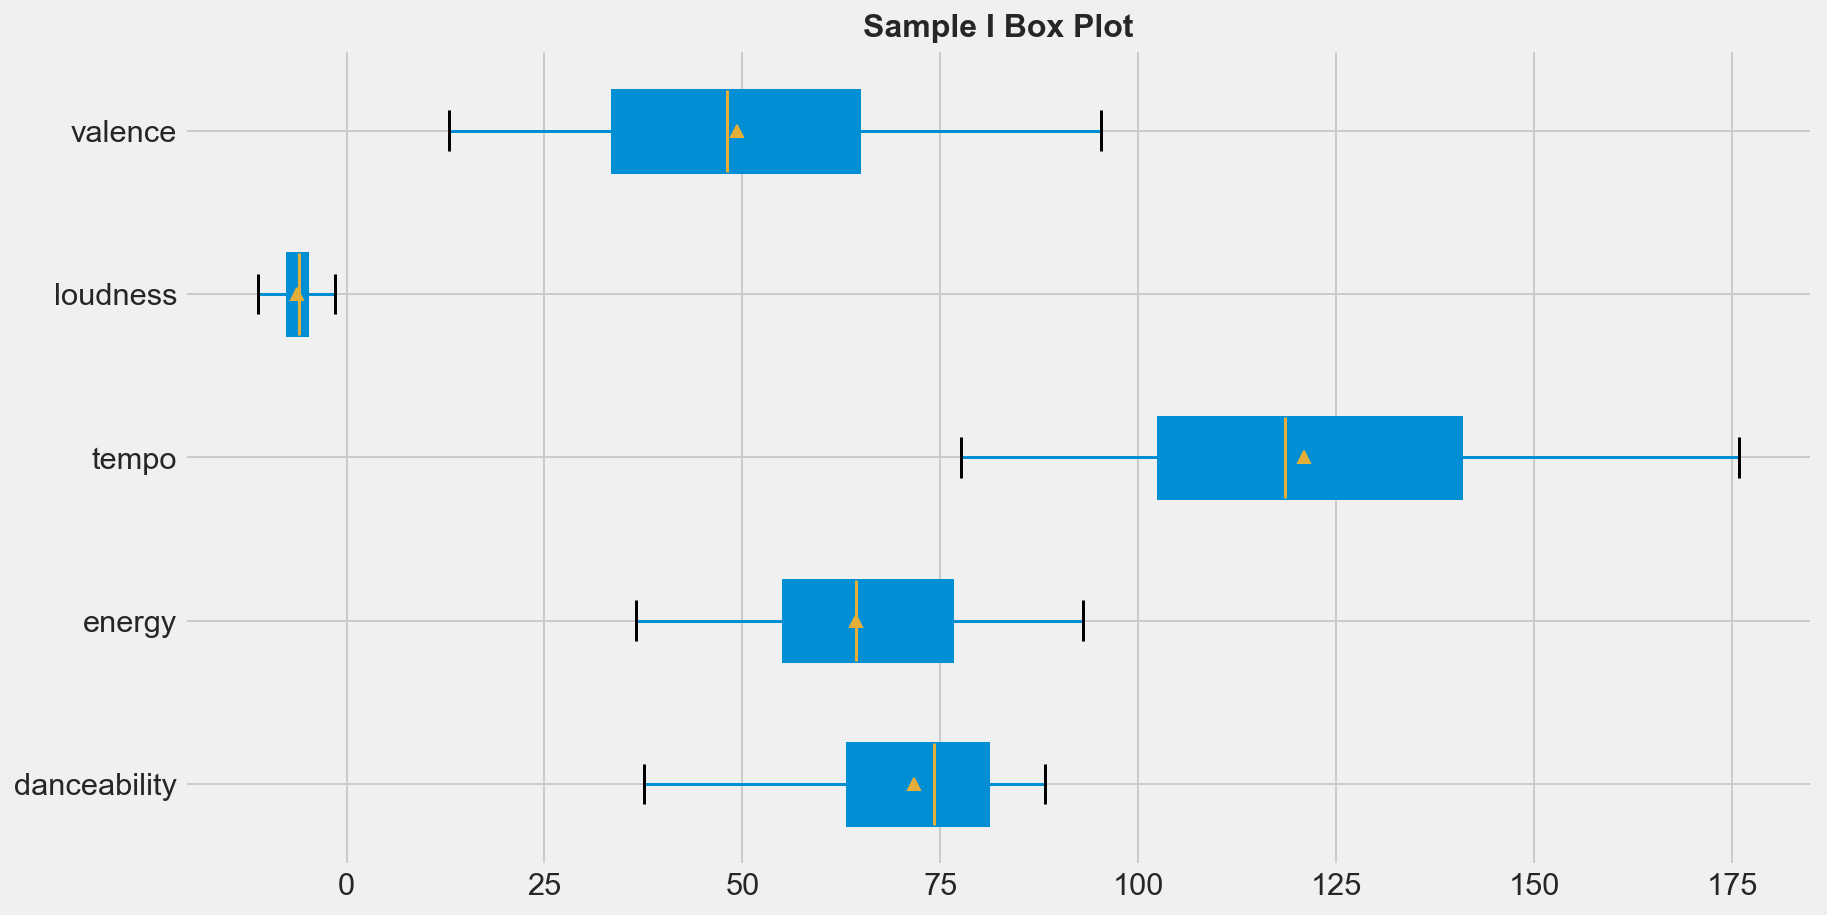

In [100]:
df_pop_sample_I.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Sample I Box Plot", fontsize=16, fontweight='heavy')
plt.show()

We concatenate the df_party with the sample above and get the 1st expanded edition of the original playlist:

In [101]:
df_party_exp_I = pd.concat([df_party, df_pop_sample_I])
display(df_party.describe())
df_party_exp_I.describe()

,danceability,energy,tempo,loudness,valence
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,69.556800,88.343200,125.455656,-4.541128,51.893040
std,11.315863,10.761515,8.300572,1.647072,25.111226
min,35.400000,58.300000,79.526000,-9.864000,3.920000
25%,62.100000,83.700000,124.034000,-5.484000,31.300000
50%,68.200000,92.200000,125.229000,-4.157000,52.600000
75%,77.200000,96.500000,126.018000,-3.430000,72.500000
max,96.700000,99.700000,171.017000,-0.131000,96.500000


,danceability,energy,tempo,loudness,valence
count,165.000000,165.000000,165.000000,165.000000,165.000000
mean,70.053939,82.514545,124.367533,-4.964891,51.276545
std,11.634062,15.803902,15.604596,1.887711,24.146669
min,35.400000,36.500000,77.599000,-11.144000,3.920000
25%,62.100000,74.000000,123.024000,-5.941000,32.200000
50%,69.300000,88.600000,125.025000,-4.777000,51.200000
75%,78.900000,94.900000,126.048000,-3.639000,69.900000
max,96.700000,99.700000,199.827000,-0.131000,96.500000


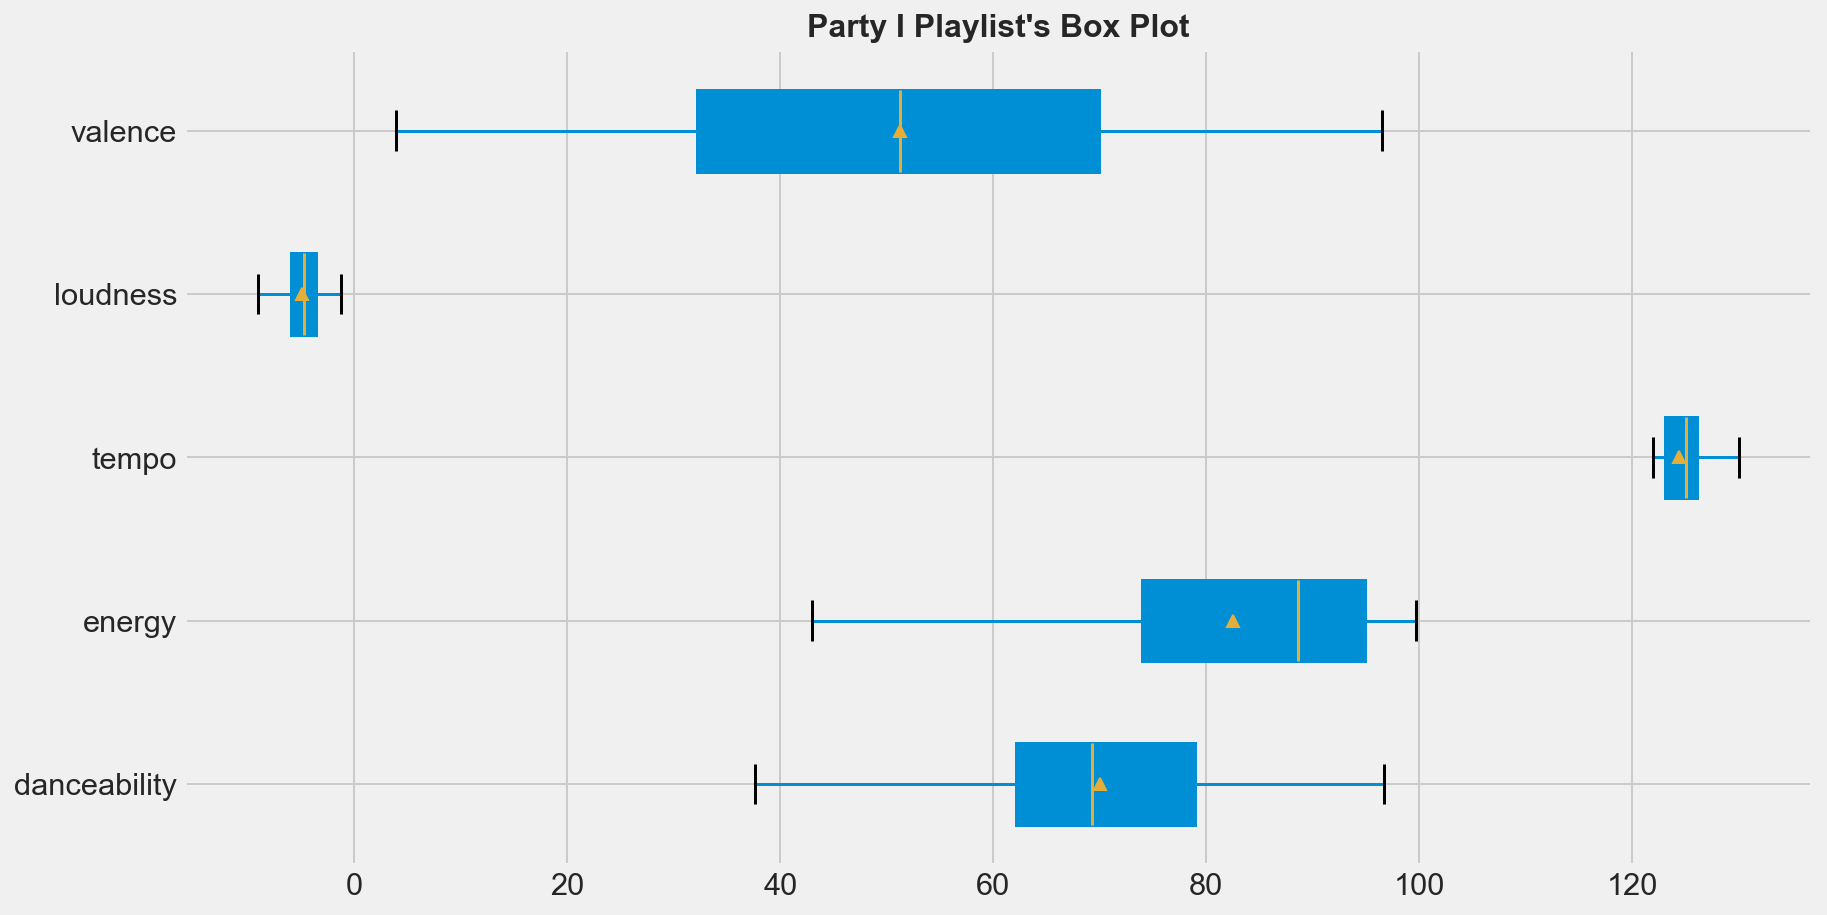

In [102]:
df_party_exp_I.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Party I Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

🔹Our prime audio feature `danceability` was increased; the mean got up by almost 0.5. Furthermore, the distribution of tracks along this feature was also optimised slightly. That is, the 2nd (Median) and 3rd (Upper) quartiles have been shifted to the right, from 68.20 to 69.30 and 77.20 to 78.90, respectively.

🔹The `valence` feature, however, got decreased by 0.61, while at the same time, none of the quartiles moved to the "right". With that in mind, we should seek for further optimization opportunities.
### Approach II
This time we are going to implement NumPy Boolean Indexing and filter the Pop data set to only bring the rows that meet the criteria we specify. Particularly, we specify the `danceability` and `valence` features to be above the respective Means of the Party playlist, 69.55 and 51.89.

In [103]:
df_pop_sample_II = df_pop[(df_pop['danceability'] > 69.55) & (df_pop['valence'] > 51.89)].copy()

In [104]:
df_pop_sample_II.describe()

,danceability,energy,tempo,loudness,valence
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,79.250000,65.411111,129.683583,-6.206639,70.702778
std,5.578249,12.426418,29.613113,1.664145,12.020542
min,69.600000,27.800000,92.101000,-10.745000,52.000000
25%,75.600000,58.900000,102.492250,-7.085250,59.825000
50%,78.800000,65.850000,123.452000,-6.283000,69.500000
75%,82.950000,74.125000,151.526750,-5.626750,78.075000
max,90.400000,89.100000,183.847000,-1.475000,96.200000


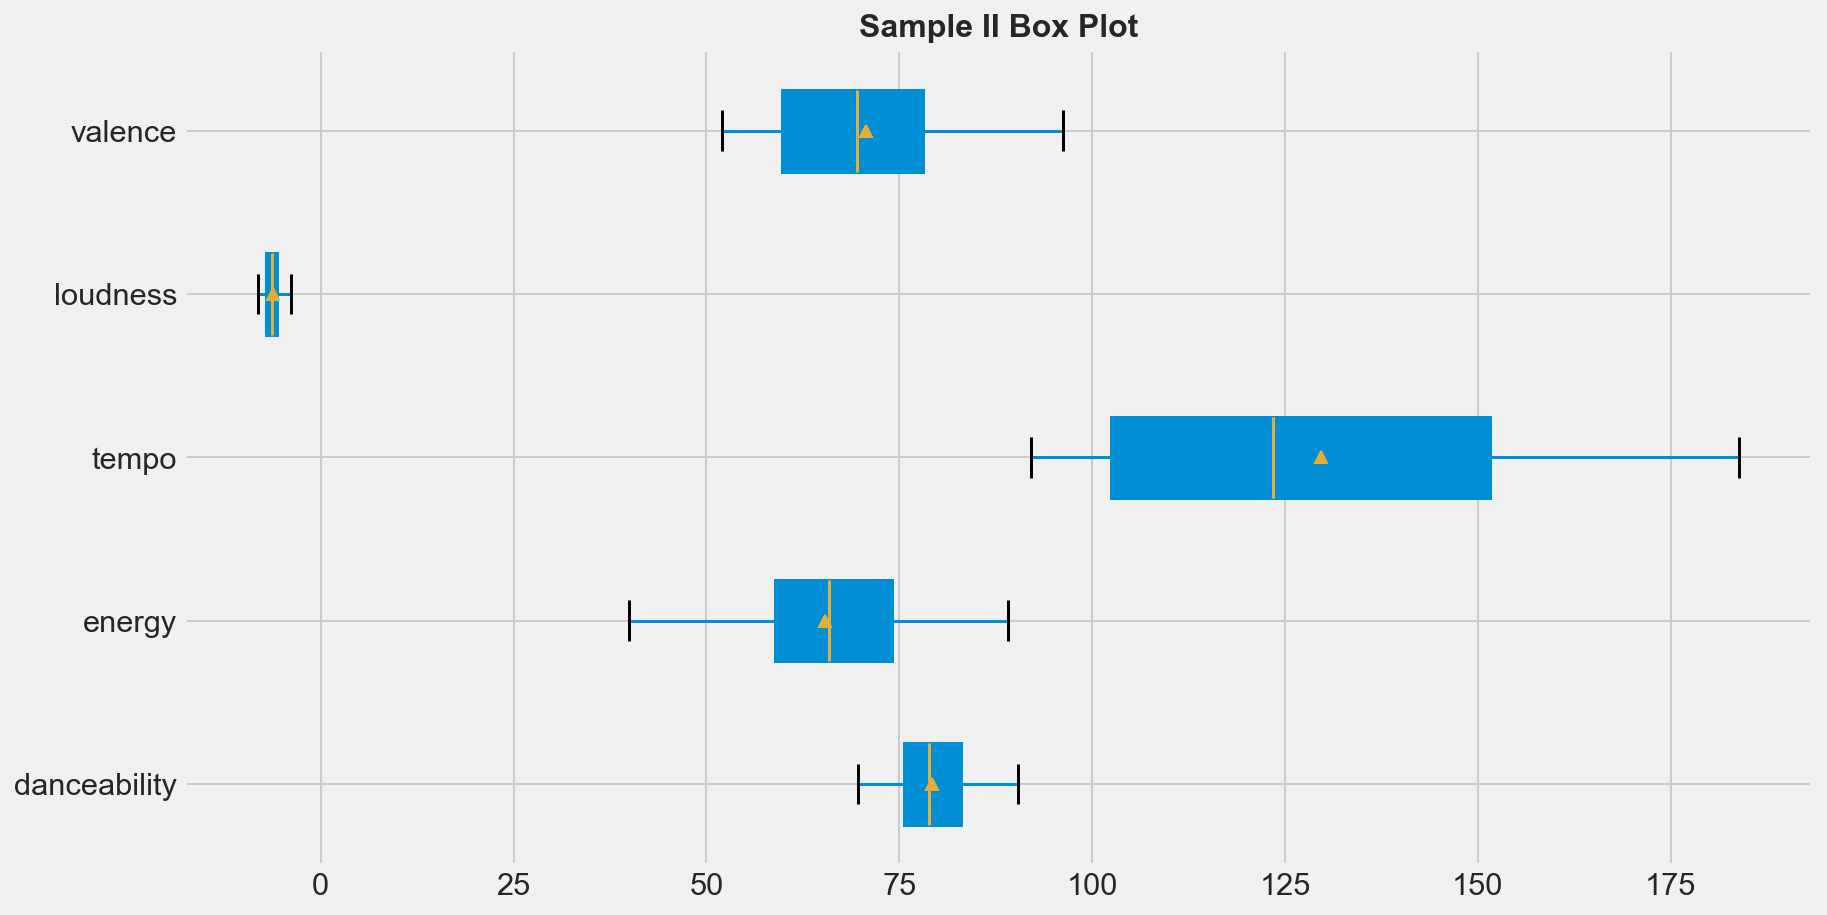

In [105]:
df_pop_sample_II.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Sample II Box Plot", fontsize=16, fontweight='heavy')
plt.show()

In [106]:
df_party_exp_II = pd.concat([df_party, df_pop_sample_II])
display(df_party.describe())
df_party_exp_II.describe()

,danceability,energy,tempo,loudness,valence
count,125.000000,125.000000,125.000000,125.000000,125.000000
mean,69.556800,88.343200,125.455656,-4.541128,51.893040
std,11.315863,10.761515,8.300572,1.647072,25.111226
min,35.400000,58.300000,79.526000,-9.864000,3.920000
25%,62.100000,83.700000,124.034000,-5.484000,31.300000
50%,68.200000,92.200000,125.229000,-4.157000,52.600000
75%,77.200000,96.500000,126.018000,-3.430000,72.500000
max,96.700000,99.700000,171.017000,-0.131000,96.500000


,danceability,energy,tempo,loudness,valence
count,161.000000,161.000000,161.000000,161.00000,161.000000
mean,71.724224,83.215528,126.401031,-4.91354,56.098944
std,11.066079,14.676416,15.759112,1.78685,24.126930
min,35.400000,27.800000,79.526000,-10.74500,3.920000
25%,63.800000,74.000000,123.983000,-5.99300,35.400000
50%,72.100000,88.700000,125.229000,-4.86300,58.500000
75%,79.400000,95.000000,126.173000,-3.62100,74.800000
max,96.700000,99.700000,183.847000,-0.13100,96.500000


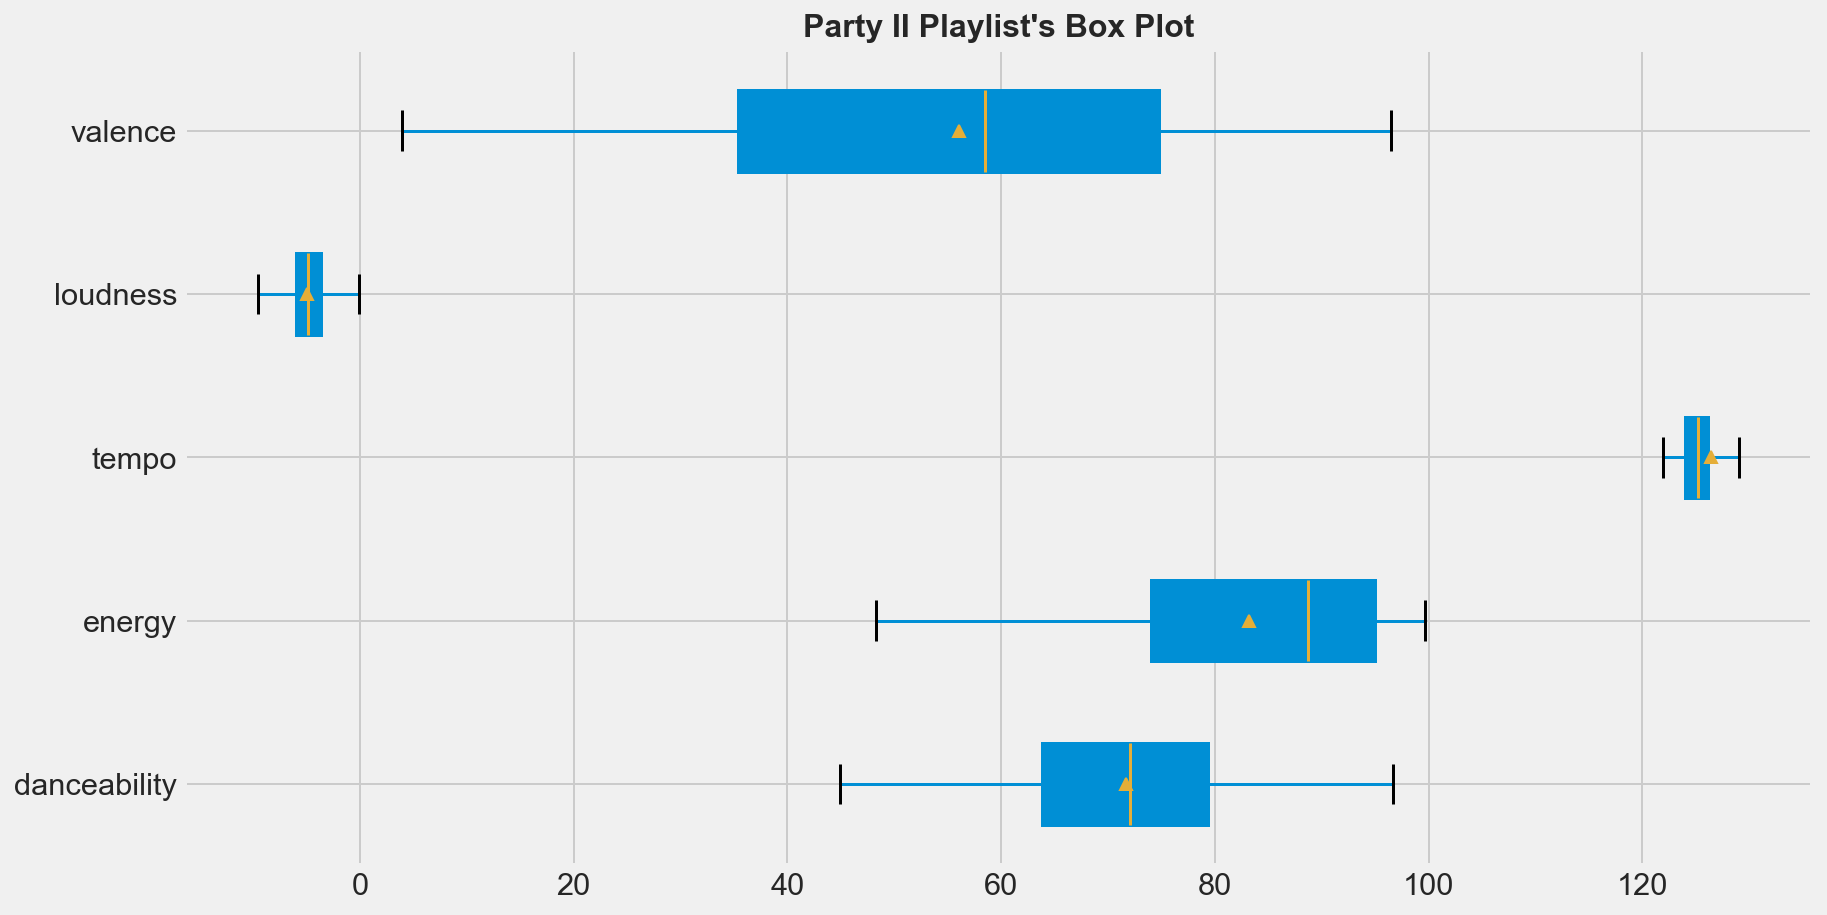

In [107]:
df_party_exp_II.boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Party II Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

🔹Our prime audio feature `danceability` increased more this time; the Mean got up by almost 2.17! Furthermore, the distribution of tracks along this feature was also optimised as the 2nd (Median) and 3rd (Upper) quartiles shifted to the right. That means that at least 50% of the playlist is above the "new" higher Mean (71.71) of the primary acoustic feature.

🔹The `valence` feature decreased by 4.21, as well, with both the 2nd and 3rd quartiles remaining above the Mean.
### Approach III
As already been mentioned, the optimization of one feature doesn't necessarily mean optimization for the rest of them. We may enhance `danceability` but risk to deteriorate `tempo`. In an effort to ameliorate this phenomenon, we are going to introduce an equation, the variables of which are the acoustic features:

Score = (danceability * 30) + (energy * 20) + (tempo * 20) + (loudness * 10) + (valence * 20)

Apparently, each variable's paramater is essentially its respective weight, that we have to pre-define. Since we give much credit to the `danceability` and `valence` features, the respective weights are higher.

We calculate this score for every single track of the playlist (create a new column) and then calculate the respective descriptive statistics. That way, we can better evaluate each action of enriching the current (Party) playlist, while at the same time achieve a more uniform (according to our "taste") optimization across each feature.

With that in mind, we re-evaluate the past 2 approaches:

In [108]:
df_party['score'] = df_party['danceability'] * 30 + df_party['energy'] * 20 + df_party['tempo'] * 20 + df_party['loudness'] * 10 + df_party['valence'] * 20
df_party.describe()

,danceability,energy,tempo,loudness,valence,score
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,69.556800,88.343200,125.455656,-4.541128,51.893040,7355.130640
std,11.315863,10.761515,8.300572,1.647072,25.111226,633.353367
min,35.400000,58.300000,79.526000,-9.864000,3.920000,5836.180000
25%,62.100000,83.700000,124.034000,-5.484000,31.300000,6941.510000
50%,68.200000,92.200000,125.229000,-4.157000,52.600000,7399.290000
75%,77.200000,96.500000,126.018000,-3.430000,72.500000,7791.010000
max,96.700000,99.700000,171.017000,-0.131000,96.500000,8714.270000


In [109]:
df_party_exp_I['score'] = df_party_exp_I['danceability'] * 30 + df_party_exp_I['energy'] * 20 + df_party_exp_I['tempo'] * 20 + df_party_exp_I['loudness'] * 10 + df_party_exp_I['valence'] * 20
df_party_exp_I.describe()

,danceability,energy,tempo,loudness,valence,score
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,70.053939,82.514545,124.367533,-4.964891,51.276545,7215.141758
std,11.634062,15.803902,15.604596,1.887711,24.146669,813.478955
min,35.400000,36.500000,77.599000,-11.144000,3.920000,3732.130000
25%,62.100000,74.000000,123.024000,-5.941000,32.200000,6703.880000
50%,69.300000,88.600000,125.025000,-4.777000,51.200000,7254.300000
75%,78.900000,94.900000,126.048000,-3.639000,69.900000,7755.610000
max,96.700000,99.700000,199.827000,-0.131000,96.500000,8839.300000


More than obviously, though **Approach I** lead us to a better `danceability` than the original playlist, it deteriorated the overall expericence of the party. The mean `score` decreased to 7215 from 7355!

In [110]:
df_party_exp_II['score'] = df_party_exp_II['danceability'] * 30 + df_party_exp_II['energy'] * 20 + df_party_exp_II['tempo'] * 20 + df_party_exp_II['loudness'] * 10 + df_party_exp_II['valence'] * 20
df_party_exp_II.describe()

,danceability,energy,tempo,loudness,valence,score
count,161.000000,161.000000,161.000000,161.00000,161.000000,161.000000
mean,71.724224,83.215528,126.401031,-4.91354,56.098944,7416.901366
std,11.066079,14.676416,15.759112,1.78685,24.126930,645.626741
min,35.400000,27.800000,79.526000,-10.74500,3.920000,5836.180000
25%,63.800000,74.000000,123.983000,-5.99300,35.400000,7003.590000
50%,72.100000,88.700000,125.229000,-4.86300,58.500000,7417.370000
75%,79.400000,95.000000,126.173000,-3.62100,74.800000,7866.570000
max,96.700000,99.700000,183.847000,-0.13100,96.500000,8839.300000


As far as the **Approach II** is concerned, the mean `score` got up by almost 62 points! This approach ensures:
* higher `danceability` and `valence` (\*)
* better distribution of the tracks along both features (\*)
* higher score of all the "ingredenient" features (according to the specified weigths), fostering higher potential for a more uniform playlist

(\*) analysed above

Now, we are going to calculate the `score` column for the Pop playlist and this time use it to filter that data set, so as to fetch the rows that meet the new criteria. Specifically, we seek for opportunities to increase the current Party playlist's Mean `score`, thus seek for tracks that note a higher `score` than that:

In [111]:
df_pop['score'] = df_pop['danceability'] * 30 + df_pop['energy'] * 20 + df_pop['tempo'] * 20 + df_pop['loudness'] * 10 + df_pop['valence'] * 20
df_pop.describe()

,danceability,energy,tempo,loudness,valence,score
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,69.746535,64.533663,121.015535,-6.436386,51.571980,6770.455743
std,12.555227,17.013937,28.880686,2.325466,21.038965,1091.825378
min,37.600000,14.600000,73.537000,-15.383000,5.170000,3019.410000
25%,60.500000,55.600000,99.987000,-7.454000,35.900000,6055.490000
50%,71.000000,66.600000,116.735000,-6.283000,50.800000,6855.740000
75%,78.900000,76.400000,140.005000,-5.173000,67.700000,7507.670000
max,90.400000,99.600000,199.827000,-0.578000,96.200000,8839.300000


In [112]:
df_pop_sample_III = df_pop[df_pop['score'] > df_party['score'].mean()].copy()

In [113]:
df_party_exp_III = pd.concat([df_party, df_pop_sample_III])
display(df_party.describe())
df_party_exp_III.describe()

,danceability,energy,tempo,loudness,valence,score
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,69.556800,88.343200,125.455656,-4.541128,51.893040,7355.130640
std,11.315863,10.761515,8.300572,1.647072,25.111226,633.353367
min,35.400000,58.300000,79.526000,-9.864000,3.920000,5836.180000
25%,62.100000,83.700000,124.034000,-5.484000,31.300000,6941.510000
50%,68.200000,92.200000,125.229000,-4.157000,52.600000,7399.290000
75%,77.200000,96.500000,126.018000,-3.430000,72.500000,7791.010000
max,96.700000,99.700000,171.017000,-0.131000,96.500000,8714.270000


,danceability,energy,tempo,loudness,valence,score
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,70.722436,84.802564,129.415256,-4.759385,55.948910,7477.413846
std,11.214010,13.087029,16.149291,1.723605,24.599738,645.927074
min,35.400000,48.300000,79.526000,-9.864000,3.920000,5836.180000
25%,62.475000,78.125000,124.031750,-5.743000,34.875000,7083.760000
50%,70.950000,88.850000,125.971000,-4.627500,58.450000,7496.785000
75%,78.900000,95.175000,128.008000,-3.534750,76.675000,7945.687500
max,96.700000,99.700000,199.827000,-0.131000,96.500000,8839.300000


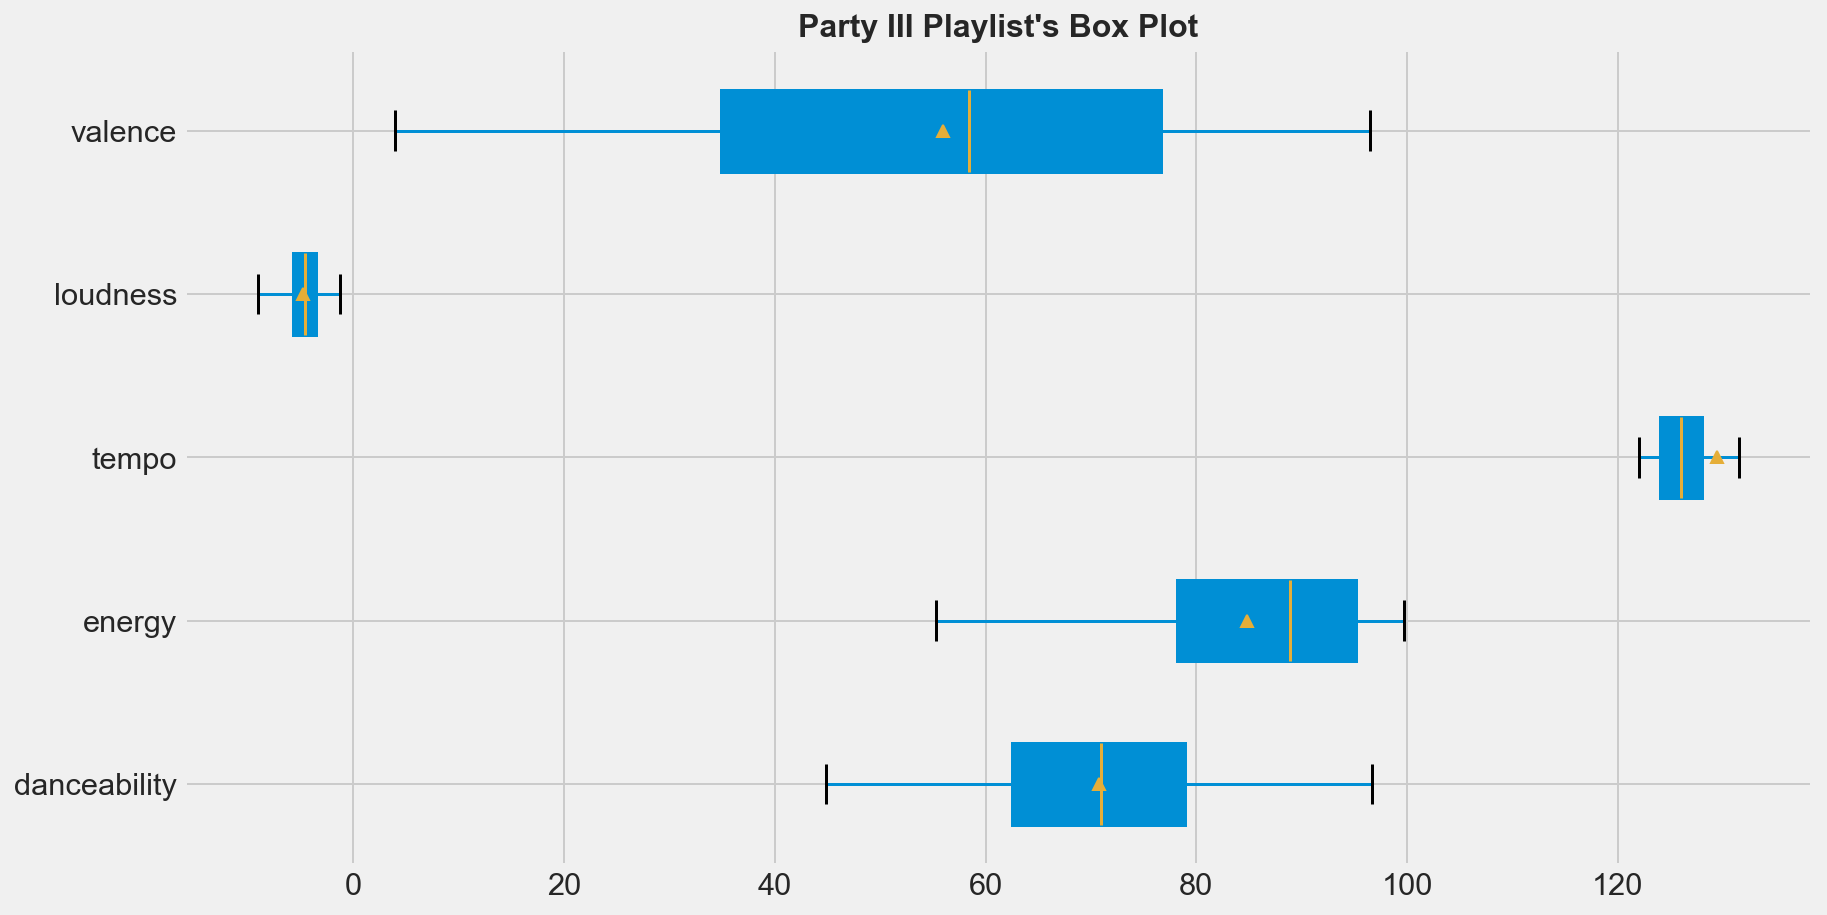

In [114]:
df_party_exp_III.iloc[:, :-1].boxplot(vert = False, figsize = (13,7), showfliers = False, showmeans = True, 
                 patch_artist=True, boxprops=dict(linestyle='-', linewidth=1.5),
                 flierprops=dict(linestyle='-', linewidth=1.5),
                 medianprops=dict(linestyle='-', linewidth=1.5),
                 whiskerprops=dict(linestyle='-', linewidth=1.5),
                 capprops=dict(linestyle='-', linewidth=1.5))

plt.title("Party III Playlist's Box Plot", fontsize=16, fontweight='heavy')
plt.show()

As far as the **Approach III** is concerned, the `danceability` feature got up by almost 1.17 and the `valence` by 4.06, while both distributions were improved. In terms of `score` accomplishment, this approach noted a 122,3 value which is the best until now! Summing up all the data sets descriptive statistics, we get:

In [115]:
display(df_party.describe())
display(df_party_exp_I.describe())
display(df_party_exp_II.describe())
df_party_exp_III.describe()

,danceability,energy,tempo,loudness,valence,score
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,69.556800,88.343200,125.455656,-4.541128,51.893040,7355.130640
std,11.315863,10.761515,8.300572,1.647072,25.111226,633.353367
min,35.400000,58.300000,79.526000,-9.864000,3.920000,5836.180000
25%,62.100000,83.700000,124.034000,-5.484000,31.300000,6941.510000
50%,68.200000,92.200000,125.229000,-4.157000,52.600000,7399.290000
75%,77.200000,96.500000,126.018000,-3.430000,72.500000,7791.010000
max,96.700000,99.700000,171.017000,-0.131000,96.500000,8714.270000


,danceability,energy,tempo,loudness,valence,score
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,70.053939,82.514545,124.367533,-4.964891,51.276545,7215.141758
std,11.634062,15.803902,15.604596,1.887711,24.146669,813.478955
min,35.400000,36.500000,77.599000,-11.144000,3.920000,3732.130000
25%,62.100000,74.000000,123.024000,-5.941000,32.200000,6703.880000
50%,69.300000,88.600000,125.025000,-4.777000,51.200000,7254.300000
75%,78.900000,94.900000,126.048000,-3.639000,69.900000,7755.610000
max,96.700000,99.700000,199.827000,-0.131000,96.500000,8839.300000


,danceability,energy,tempo,loudness,valence,score
count,161.000000,161.000000,161.000000,161.00000,161.000000,161.000000
mean,71.724224,83.215528,126.401031,-4.91354,56.098944,7416.901366
std,11.066079,14.676416,15.759112,1.78685,24.126930,645.626741
min,35.400000,27.800000,79.526000,-10.74500,3.920000,5836.180000
25%,63.800000,74.000000,123.983000,-5.99300,35.400000,7003.590000
50%,72.100000,88.700000,125.229000,-4.86300,58.500000,7417.370000
75%,79.400000,95.000000,126.173000,-3.62100,74.800000,7866.570000
max,96.700000,99.700000,183.847000,-0.13100,96.500000,8839.300000


,danceability,energy,tempo,loudness,valence,score
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,70.722436,84.802564,129.415256,-4.759385,55.948910,7477.413846
std,11.214010,13.087029,16.149291,1.723605,24.599738,645.927074
min,35.400000,48.300000,79.526000,-9.864000,3.920000,5836.180000
25%,62.475000,78.125000,124.031750,-5.743000,34.875000,7083.760000
50%,70.950000,88.850000,125.971000,-4.627500,58.450000,7496.785000
75%,78.900000,95.175000,128.008000,-3.534750,76.675000,7945.687500
max,96.700000,99.700000,199.827000,-0.131000,96.500000,8839.300000


In [116]:
display(df_party.shape[0])
display(df_party_exp_I.shape[0])
display(df_party_exp_II.shape[0])
df_party_exp_III.shape[0]

125

165

161

156

Text(0.5, 1.0, "KDE Plots of Playlists' Versions")

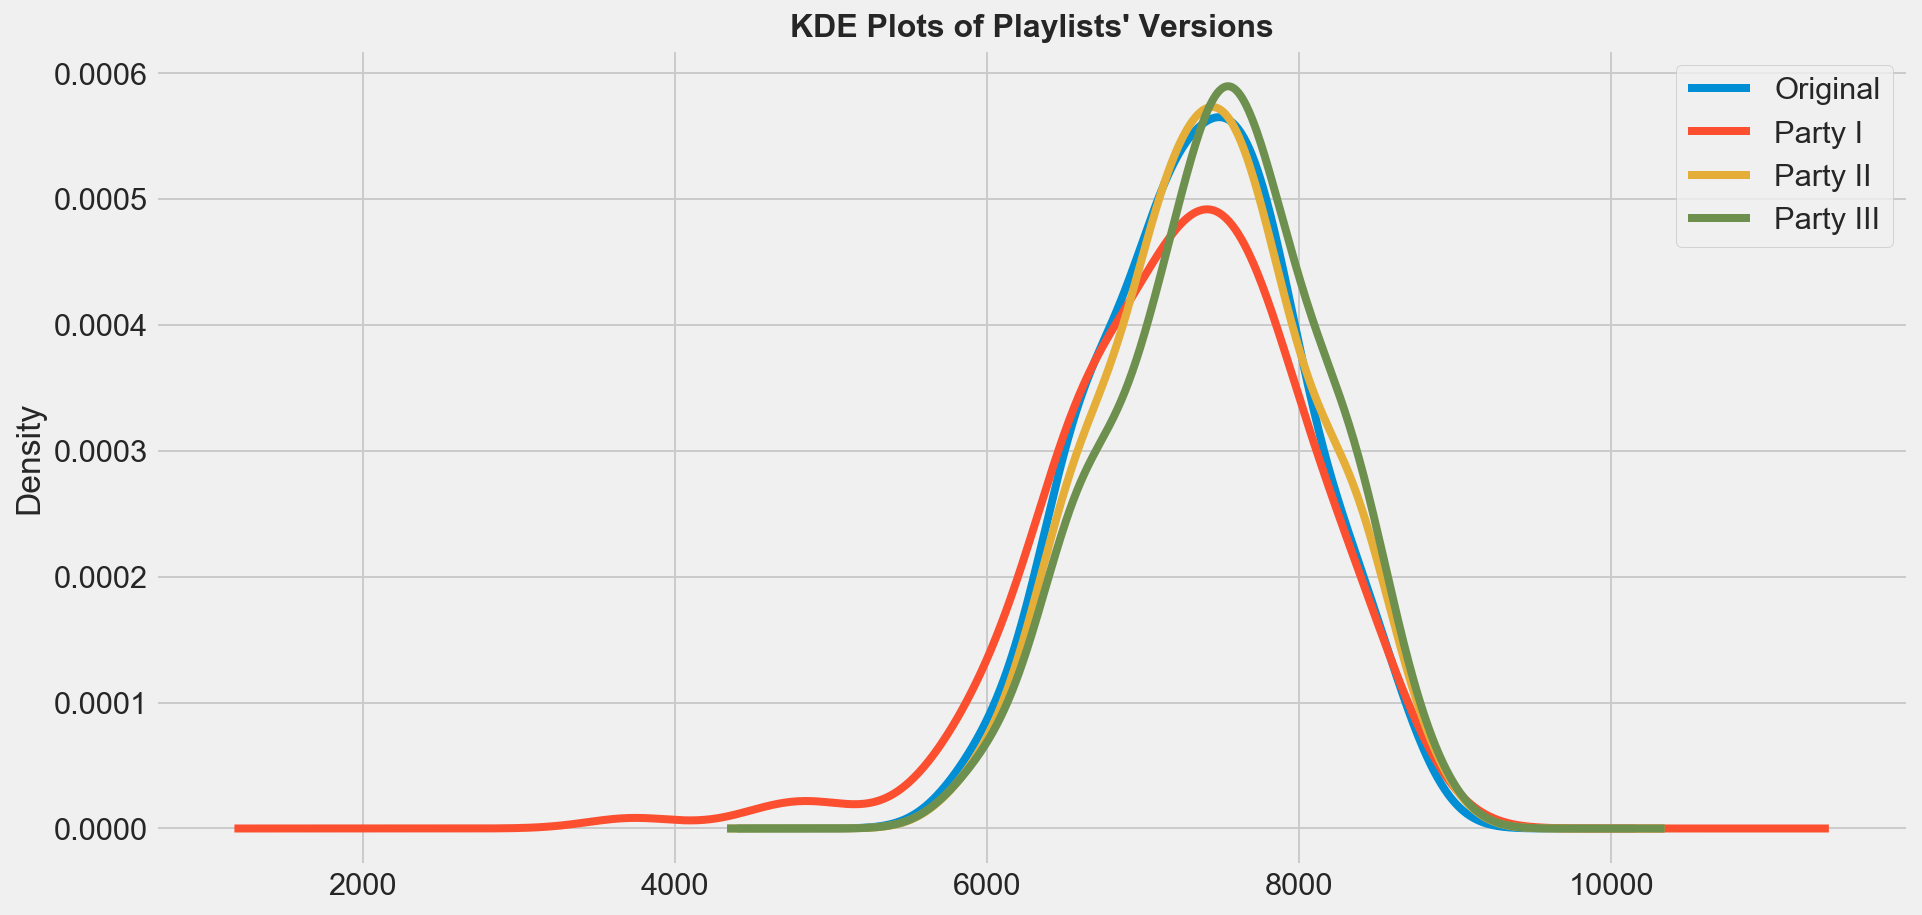

In [117]:
df_party['score'].plot.kde(figsize = (14, 7), label = 'Original', legend = True)
df_party_exp_I['score'].plot.kde(figsize = (14, 7), label = 'Party I', legend = True)
df_party_exp_II['score'].plot.kde(figsize = (14, 7), label = 'Party II', legend = True)
df_party_exp_III['score'].plot.kde(figsize = (14, 7), label = 'Party III', legend = True)

plt.title("KDE Plots of Playlists\' Versions", fontsize=16, fontweight='heavy')

From the last depiction (kernel density plots) we can easily infer that the **Approach III** meets all the initial criteria we specified:

✔️ higher `danceability` and `valence` audio features than the original playlists's

✔️ better distribution of the tracks along both features

✔️ highest aggregate score of all the features, meaning higher potential for a more uniform playlist

## Create the New Playlist
Next, we are going to create a new playlist and add to it all the tracks we ended up selecting:

In [118]:
# Authorization flow

scope = "playlist-modify-public"
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=412a5c5cfedd4d15b71c65b4610ad586&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A7777%2Fcallback&scope=playlist-modify-public in your browser


Enter the URL you were redirected to: http://localhost:7777/callback?code=AQA-EK34OecQqAVAHK8dLVhmJpzs6ia3nH3LnChCcnfpPrrghw3wgsT0mqvbmYl4mdfYL1dH7h5dqMrIwtxOKV_sU3vNztPuJ-L2lxq8lfn3vLbA3lgd0Lm7bR2UKikZb84xcY9Dyhd_d1Hi2ZJBUhUp_G1TinL1UA6Gq5tiNuK7cn58fCCbydL_U7WXdfp4W2jiIU7A05zC5_YwTy5PvdvRrcTEGm8hqIKRDw




In [119]:
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [120]:
create_playlist(sp, username, 'Pandas Party', 'A pure party playlist created by DJ Pandas!')

In [121]:
# Find the new playlist's id
fetch_playlists(sp,username)

,id,name,#tracks
0,0nc6aqIfsH98TdEnqiIRZO,Pandas Party,0
1,37SqXO5bm81JmGCiuhin0L,Dinner Time,101
2,2m75Xwwn4YqhwsxHH7Qc9W,Party Time,125
3,6Jbi3Y7ZNNgSrPaZF4DpUp,Lounge Time,100
4,3u2nUYNuI08yUg877JE5FI,Pop Challenge,101
5,5mKiMVcinbBUpP7oegJFbA,Oldie$,100
6,7CZ6IWYhLY4KmrejbeATNJ,Christmas,55
7,3vf8pNninEijOFd5No7N7C,My Shazam Tracks,108


In [122]:
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 100])
        index += 100

In [123]:
list_track = df_party_exp_III.index

In [126]:
enrich_playlist(sp, username, '779Uv1K6LcYiiWxblSDjx7', list_track)

SpotifyException: http status: 403, code:-1 - https://api.spotify.com/v1/users/11153510588/playlists/779Uv1K6LcYiiWxblSDjx7/tracks:
 Insufficient client scope

## Conclusion
We have come a long way so far; we processed hundreds of tracks, inspected their audio features and finally selected the most befitting for the party ones, using Python and only. In this way, we managed to accomplish the initially stated missions:

✔️ we demonstrated how plain (descriptive) statistics and coding - when properly combined - can figure out time-consuming activities like this.

✔️ we "tasted" (once again, after the previous project of Twitter Sentiment Analysis on the next James Bond movie) the importance of having an API available to request, so as to extract meaningful data.
## Additional Analysis
There is quite a number of additional analyses to be performed, expanding this one. You are welcome to extend and shape yours in any direction you may prefer. For instance, you can additionally try and remove the tracks that have significantly low `danceability` and `valence` audio features, and boost even more the playlist's `score`. Furthemore, you can apply each approach sequentially (on the dataframe that is produced each time).